In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1-Density

In [3]:
file_path = 'density.xlsx'
sheet1 = 'S2 | Ions' 
df1 = pd.read_excel(file_path, sheet_name=sheet1,usecols=range(8))

sheet2 = 'S5 | Fits' 
df2 = pd.read_excel(file_path, sheet_name=sheet2,usecols=range(3))


In [4]:
df1

,Ion type,Abbreviation,Chemical name,SMILES,Charge,Family,M / g/mol,Number of ILs composed of the ion
0,cation,im,1H-imidazol-3-ium,c1c[nH+]c[nH]1,1,imidazolium,69.085,4
1,cation,im-1,1-methyl-1H-imidazol-3-ium,Cn1cc[nH+]c1,1,imidazolium,83.111,8
2,cation,im-2,1-ethyl-1H-imidazol-3-ium,CCn1cc[nH+]c1,1,imidazolium,97.138,5
3,cation,im-3,1-propyl-1H-imidazol-3-ium,CCCn1cc[nH+]c1,1,imidazolium,111.164,1
4,cation,im-4,1-butyl-1H-imidazol-3-ium,CCCCn1cc[nH+]c1,1,imidazolium,125.191,6
...,...,...,...,...,...,...,...,...
1282,anion,triazolide-no2[2],"3-nitro-4H-1,2,4-triazol-4-ide",[O-][N+](=O)c1nnc[n-]1,-1,heterocyclic amines,113.057,1
1283,anion,imidazolide-no2[4],4-nitro-1H-imidazol-1-ide,[O-][N+](=O)c1c[n-]cn1,-1,heterocyclic amines,112.069,2
1284,anion,"imidazolide-cl[4],cl[5]","4,5-dichloro-1H-imidazol-1-ide",Clc1nc[n-]c1Cl,-1,heterocyclic amines,135.960,1
1285,anion,"imidazolide-cn[4],cn[5]","4,5-dicyano-1H-imidazol-1-ide",N#Cc1nc[n-]c1C#N,-1,heterocyclic amines,117.092,3


In [5]:
df2

,Cation,Anion,𝝆0 / kg/m3
0,"azp-2o1,1",ntf2,1417.947600
1,"azp-2o1,1",otf,1291.523106
2,"azp-2o1,1",tfa,1217.826112
3,"azp-2o1,2o1",ntf2,1339.338886
4,"azp-4,1",ntf2,1372.903069
...,...,...,...
1156,"turea-6,(2,0),(2,0)",ntf2,1324.076648
1157,turea-6,ntf2,1424.966059
1158,"turea-8,(1,0),(1,0)",ntf2,1316.227650
1159,"turea-8,(1,1),(1,1)",ntf2,1296.708593


In [6]:
# Create a new column that combines the cation and anion into a single string
df2['Cation_Anion_Pair'] = df2['Cation'].astype(str) + "_" + df2['Anion'].astype(str)
# Now count the number of unique pairs
unique_pairs_count = df2['Cation_Anion_Pair'].nunique()
# Drop the 'Cation_Anion_Pair' column from df2
df2 = df2.drop('Cation_Anion_Pair', axis=1)
print("The number of unique ILs is: ",unique_pairs_count)


The number of unique ILs is:  1161


In [7]:
# Create empty lists to store the SMILES and the molecular masses of cations and anions
name_cat_list = []
smiles_cat_list = []
mass_cat_list = []


name_an_list = []
smiles_an_list = []
mass_an_list = []

# Loop over the indices of df2 using a for loop
for i in df2.index:

    matching_row_cat = df1[df1['Abbreviation'] == df2["Cation"][i]]
    name_cat = matching_row_cat["Chemical name"].iloc[0]
    smiles_cat = matching_row_cat["SMILES"].iloc[0]
    mass_cat = matching_row_cat["M / g/mol"].iloc[0]
    
    matching_row_an = df1[df1['Abbreviation'] == df2["Anion"][i]]
    name_an = matching_row_an["Chemical name"].iloc[0]
    smiles_an = matching_row_an["SMILES"].iloc[0]
    mass_an = matching_row_an["M / g/mol"].iloc[0]

    # Append the SMILES and masses to the lists
    name_cat_list.append(name_cat)
    smiles_cat_list.append(smiles_cat)
    mass_cat_list.append(mass_cat)
    
    name_an_list.append(name_an)
    smiles_an_list.append(smiles_an)
    mass_an_list.append(mass_an)



In [8]:
arranged_data = {
    'Cation_Name': name_cat_list,  # Cation name
    'Anion_Name': name_an_list,   # Anion name
    'Cation_SMILES': smiles_cat_list,  # Cation SMILES
    'Anion_SMILES': smiles_an_list,    # Anion SMILES
    'Cation_Mass': mass_cat_list,   # Cation mass
    'Anion_Mass': mass_an_list,     # Anion mass
    'Density': df2.iloc[:, 2]  # Density of the ionic liquid
}

# Create a new DataFrame using the dictionary
clean_density_data = pd.DataFrame(arranged_data)

# Show the first few rows to verify the new DataFrame
print(clean_density_data.head())


                               Cation_Name  \
0  1-(2-methoxyethyl)-1-methylazepan-1-ium   
1  1-(2-methoxyethyl)-1-methylazepan-1-ium   
2  1-(2-methoxyethyl)-1-methylazepan-1-ium   
3      1,1-bis(2-methoxyethyl)azepan-1-ium   
4             1-butyl-1-methylazepan-1-ium   

                            Anion_Name           Cation_SMILES  \
0  bis(trifluoromethylsulfonyl)azanide     COCC[N+]1(C)CCCCCC1   
1            trifluoromethanesulfonate     COCC[N+]1(C)CCCCCC1   
2                     trifluoroacetate     COCC[N+]1(C)CCCCCC1   
3  bis(trifluoromethylsulfonyl)azanide  COCC[N+]1(CCOC)CCCCCC1   
4  bis(trifluoromethylsulfonyl)azanide     CCCC[N+]1(C)CCCCCC1   

                             Anion_SMILES  Cation_Mass  Anion_Mass  \
0  FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F      172.288     280.147   
1                   [O-]S(=O)(=O)C(F)(F)F      172.288     149.070   
2                       [O-]C(=O)C(F)(F)F      172.288     113.016   
3  FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F     

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

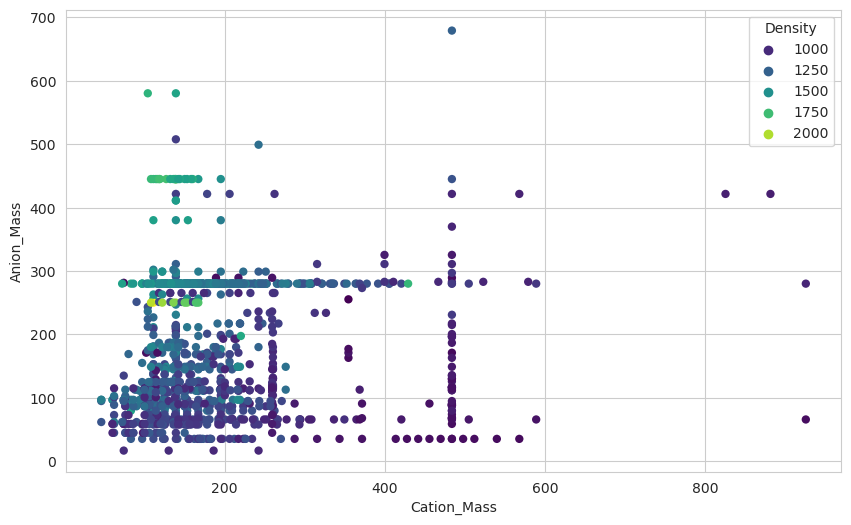

In [9]:
sns.set_style('whitegrid')

# Create a new figure with a specified size and DPI
plt.figure(figsize=(10, 6), dpi=100)

# Create the scatter plot with density represented as color
# Removed 'size' parameter for clarity
scatter = sns.scatterplot(data=clean_density_data, x='Cation_Mass', y='Anion_Mass', hue='Density', palette='viridis', edgecolor='none')

# Normalize the hue to the range of densities
norm = plt.Normalize(clean_density_data['Density'].min(), clean_density_data['Density'].max())


# Add a color bar for the density scale
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Show the color bar with the label
cbar = plt.colorbar(sm)
cbar.set_label('Density (kg/m³)')

# Set the plot labels and title
plt.xlabel('Cation Mass (g/mol)')
plt.ylabel('Anion Mass (g/mol)')
plt.title('Scatter Heatmap of Ionic Liquid Density by Cation and Anion Mass')

# Show the plot
plt.show()


In [10]:
catmass=np.array(clean_density_data["Cation_Mass"])
anmass=np.array(clean_density_data["Anion_Mass"])
dens=np.array(clean_density_data["Density"])
hi_dens_idx=np.where(dens>=1500)
lo_dens_idx=np.where(dens<1500)

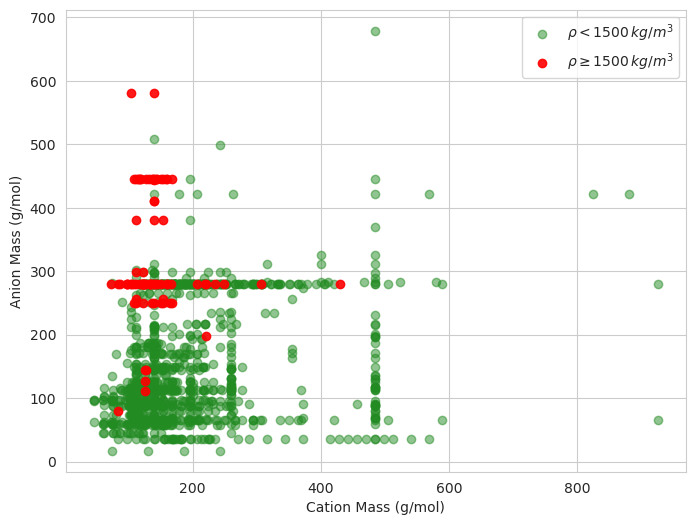

In [11]:

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(catmass[lo_dens_idx], anmass[lo_dens_idx], color='forestgreen', alpha=0.5, label=r"$\rho<1500\,kg/m^3$")
plt.scatter(catmass[hi_dens_idx], anmass[hi_dens_idx], color='red', alpha=0.9, label=r"$ \rho \geq1500\,kg/m^3$")
plt.xlabel('Cation Mass (g/mol)')
plt.ylabel('Anion Mass (g/mol)')
plt.legend()
# Show the plot
plt.show()


In [12]:
clean_density_data.to_excel('clean_density_data.xlsx', index=False)


____


## 2- Viscosity

In [13]:
file_path = 'viscosity.xlsx'
sheet1 = 'S2 | Ions' 
df1 = pd.read_excel(file_path, sheet_name=sheet1,usecols=range(8))

sheet2 = 'S6 | Modeling - reference term' 
df2 = pd.read_excel(file_path, sheet_name=sheet2,usecols=range(3))

In [14]:
df1

,Ion type,Abbreviation,Chemical name,SMILES,Charge,Family,M / g/mol,Number of ILs composed of the ion
0,cation,im,1H-imidazol-3-ium,c1c[nH+]c[nH]1,1,imidazolium,69.085,4
1,cation,im-1,1-methyl-1H-imidazol-3-ium,Cn1cc[nH+]c1,1,imidazolium,83.111,4
2,cation,im-2,1-ethyl-1H-imidazol-3-ium,CCn1cc[nH+]c1,1,imidazolium,97.138,8
3,cation,im-4,1-butyl-1H-imidazol-3-ium,CCCCn1cc[nH+]c1,1,imidazolium,125.191,5
4,cation,im-6oh,1-(6-hydroxyhexyl)-1H-imidazol-3-ium,OCCCCCCn1cc[nH+]c1,1,imidazolium,169.244,1
...,...,...,...,...,...,...,...,...
1139,anion,triazolide123,"1H-1,2,3-triazol-1-ide",c1c[n-]nn1,-1,heterocyclic amines,68.060,7
1140,anion,imidazolide-no2[4],4-nitro-1H-imidazol-1-ide,[O-][N+](=O)c1c[n-]cn1,-1,heterocyclic amines,112.069,2
1141,anion,"imidazolide-cl[4],cl[5]","4,5-dichloro-1H-imidazol-1-ide",Clc1nc[n-]c1Cl,-1,heterocyclic amines,135.960,1
1142,anion,"imidazolide-cn[4],cn[5]","4,5-dicyano-1H-imidazol-1-ide",N#Cc1nc[n-]c1C#N,-1,heterocyclic amines,117.092,1


In [15]:
df2

,Cation,Anion,ln(η0 / mPa s)
0,"azp-2o1,1",ntf2,4.904210
1,"azp-2o1,1",otf,6.693790
2,"azp-2o1,1",tfa,6.361822
3,"azp-2o1,2o1",ntf2,4.910953
4,"azp-4,1",ntf2,5.727393
...,...,...,...
1969,turea-6,ntf2,5.438362
1970,"turea-8,(1,0),(1,0)",ntf2,4.879179
1971,"turea-8,(1,1),(1,1)",ntf2,4.683862
1972,"turea-8,(2,0),(2,0)",ntf2,5.351164


In [16]:
# Create a new column that combines the cation and anion into a single string
df2['Cation_Anion_Pair'] = df2['Cation'].astype(str) + "_" + df2['Anion'].astype(str)
# Now count the number of unique pairs
unique_pairs_count = df2['Cation_Anion_Pair'].nunique()
# Drop the 'Cation_Anion_Pair' column from df2
df2 = df2.drop('Cation_Anion_Pair', axis=1)
print("The number of unique ILs is: ",unique_pairs_count)

The number of unique ILs is:  1974


In [17]:
# Create empty lists to store the SMILES and the molecular masses of cations and anions
name_cat_list = []
smiles_cat_list = []
mass_cat_list = []


name_an_list = []
smiles_an_list = []
mass_an_list = []

# Loop over the indices of df2 using a for loop
for i in df2.index:

    matching_row_cat = df1[df1['Abbreviation'] == df2["Cation"][i]]
    name_cat = matching_row_cat["Chemical name"].iloc[0]
    smiles_cat = matching_row_cat["SMILES"].iloc[0]
    mass_cat = matching_row_cat["M / g/mol"].iloc[0]
    
    matching_row_an = df1[df1['Abbreviation'] == df2["Anion"][i]]
    name_an = matching_row_an["Chemical name"].iloc[0]
    smiles_an = matching_row_an["SMILES"].iloc[0]
    mass_an = matching_row_an["M / g/mol"].iloc[0]

    # Append the SMILES and masses to the lists
    name_cat_list.append(name_cat)
    smiles_cat_list.append(smiles_cat)
    mass_cat_list.append(mass_cat)
    
    name_an_list.append(name_an)
    smiles_an_list.append(smiles_an)
    mass_an_list.append(mass_an)



In [18]:
arranged_data = {
    'Cation_Name': name_cat_list,  # Cation name
    'Anion_Name': name_an_list,   # Anion name
    'Cation_SMILES': smiles_cat_list,  # Cation SMILES
    'Anion_SMILES': smiles_an_list,    # Anion SMILES
    'Cation_Mass': mass_cat_list,   # Cation mass
    'Anion_Mass': mass_an_list,     # Anion mass
    'η0': np.exp(df2.iloc[:, 2]) / 1000  # Viscosity ln(mPa.s) --> Pa.s
}

# Create a new DataFrame using the dictionary
clean_viscosity_data = pd.DataFrame(arranged_data)

# Show the first few rows to verify the new DataFrame
print(clean_viscosity_data.head())


                               Cation_Name  \
0  1-(2-methoxyethyl)-1-methylazepan-1-ium   
1  1-(2-methoxyethyl)-1-methylazepan-1-ium   
2  1-(2-methoxyethyl)-1-methylazepan-1-ium   
3      1,1-bis(2-methoxyethyl)azepan-1-ium   
4             1-butyl-1-methylazepan-1-ium   

                            Anion_Name           Cation_SMILES  \
0  bis(trifluoromethylsulfonyl)azanide     COCC[N+]1(C)CCCCCC1   
1            trifluoromethanesulfonate     COCC[N+]1(C)CCCCCC1   
2                     trifluoroacetate     COCC[N+]1(C)CCCCCC1   
3  bis(trifluoromethylsulfonyl)azanide  COCC[N+]1(CCOC)CCCCCC1   
4  bis(trifluoromethylsulfonyl)azanide     CCCC[N+]1(C)CCCCCC1   

                             Anion_SMILES  Cation_Mass  Anion_Mass        η0  
0  FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F      172.288     280.147  0.134856  
1                   [O-]S(=O)(=O)C(F)(F)F      172.288     149.070  0.807376  
2                       [O-]C(=O)C(F)(F)F      172.288     113.016  0.579301  
3  FC(F)(F

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

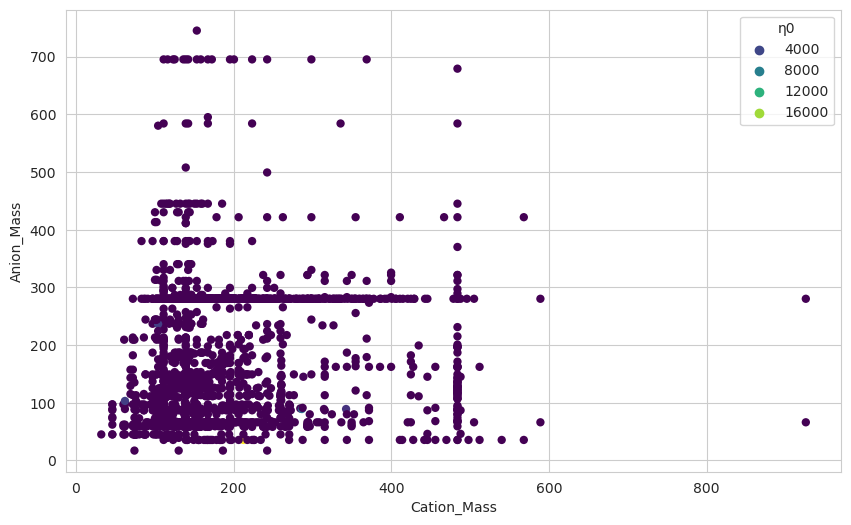

In [19]:
sns.set_style('whitegrid')

# Create a new figure with a specified size and DPI
plt.figure(figsize=(10, 6), dpi=100)

# Create the scatter plot with density represented as color
# Removed 'size' parameter for clarity
scatter = sns.scatterplot(data=clean_viscosity_data, x='Cation_Mass', y='Anion_Mass', hue='η0', palette='viridis', edgecolor='none')

# Normalize the hue to the range of densities
norm = plt.Normalize(clean_viscosity_data['η0'].min(), clean_viscosity_data['η0'].max())


# Add a color bar for the density scale
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Show the color bar with the label
cbar = plt.colorbar(sm)
cbar.set_label('η0')

# Set the plot labels and title
plt.xlabel('Cation Mass (g/mol)')
plt.ylabel('Anion Mass (g/mol)')
plt.title('Scatter Heatmap of Ionic Liquid viscosity by Cation and Anion Mass')

# Show the plot
plt.show()


In [20]:
catmass=np.array(clean_viscosity_data["Cation_Mass"])
anmass=np.array(clean_viscosity_data["Anion_Mass"])
visc=np.array(clean_viscosity_data["η0"]) # Pa.s
hi_visc_idx=np.where(visc>=0.03)
lo_visc_idx=np.where(visc<0.03)


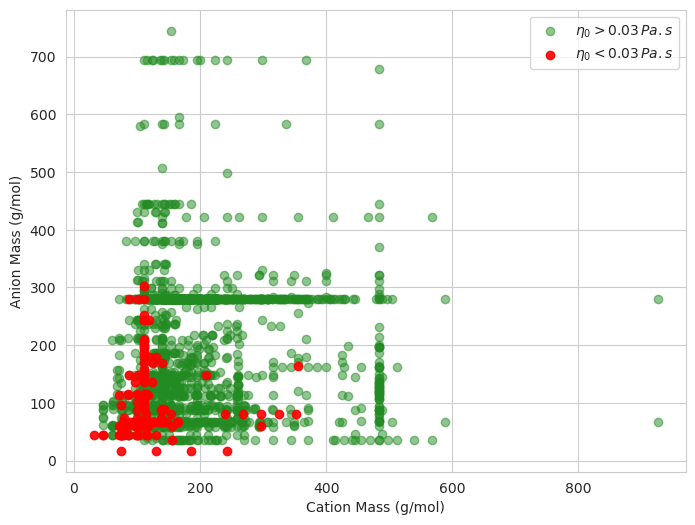

In [21]:

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(catmass[hi_visc_idx], anmass[hi_visc_idx], color='forestgreen', alpha=0.5, label=r"$\eta_0 > 0.03\, Pa.s$")
plt.scatter(catmass[lo_visc_idx], anmass[lo_visc_idx], color='red', alpha=0.9, label=r"$\eta_0 < 0.03 \, Pa.s$")
plt.xlabel('Cation Mass (g/mol)')
plt.ylabel('Anion Mass (g/mol)')
plt.legend()
# Show the plot
plt.show()

In [22]:
# Assuming clean_viscosity_data is your DataFrame
clean_viscosity_data = clean_viscosity_data[clean_viscosity_data["Anion_Name"] != 43500]


In [23]:
clean_viscosity_data.to_excel('clean_viscosity_data.xlsx', index=False)

_____

## 3-Surface Tension

In [24]:
file_path = 'surface_tension.xlsx'
sheet1 = 'S2 | Ions' 
df1 = pd.read_excel(file_path, sheet_name=sheet1,usecols=range(8))

sheet2 = 'S5 | Fits' 
df2 = pd.read_excel(file_path, sheet_name=sheet2,usecols=range(3))

In [25]:
df1

,Ion type,Abbreviation,Chemical name,SMILES,Charge,Family,M / g/mol,Number of ILs composed of the ion
0,cation,im,1H-imidazol-3-ium,c1c[nH+]c[nH]1,1,imidazolium,69.085,5
1,cation,im-1,1-methyl-1H-imidazol-3-ium,Cn1cc[nH+]c1,1,imidazolium,83.111,4
2,cation,im-2,1-ethyl-1H-imidazol-3-ium,CCn1cc[nH+]c1,1,imidazolium,97.138,2
3,cation,im-4,1-butyl-1H-imidazol-3-ium,CCCCn1cc[nH+]c1,1,imidazolium,125.191,1
4,cation,im-6,1-hexyl-1H-imidazol-3-ium,CCCCCCn1cc[nH+]c1,1,imidazolium,153.244,1
...,...,...,...,...,...,...,...,...
277,anion,asp,2-amino-3-carboxypropanoate,N[C@@H](CC(O)=O)C([O-])=O,-1,aminoacids,132.095,1
278,anion,phen,phenolate,[O-]c1ccccc1,-1,alcoholates,93.104,5
279,anion,"phen-no2[2],no2[4],no2[6]","2,4,6-trinitrobenzen-1-olate",[O-]c1c(cc(cc1[N+]([O-])=O)[N+]([O-])=O)[N+]([...,-1,alcoholates,228.097,1
280,anion,tdi,"4,5-dicyano-2-(trifluoromethyl)-1H-imidazol-1-ide",FC(F)(F)c1nc(C#N)c([n-]1)C#N,-1,heterocyclic amines,185.087,2


In [26]:
df2

,Cation,Anion,σ0 / mN/m
0,dabco-6,ntf2,53.375676
1,dbu-10,dca,47.620500
2,dbu-10,scn,41.087991
3,dbu-14,dca,42.477773
4,dbu-2,dca,61.694668
...,...,...,...
537,"pyrl-2,o2",ntf2,NaN
538,"pyrl-2,o2",otf,NaN
539,pyrro,tfa-2[f],NaN
540,quini-8,fsa,44.644351


In [27]:
# Create a new column that combines the cation and anion into a single string
df2['Cation_Anion_Pair'] = df2['Cation'].astype(str) + "_" + df2['Anion'].astype(str)
# Now count the number of unique pairs
unique_pairs_count = df2['Cation_Anion_Pair'].nunique()
# Drop the 'Cation_Anion_Pair' column from df2
df2 = df2.drop('Cation_Anion_Pair', axis=1)
print("The number of unique ILs is: ",unique_pairs_count)

The number of unique ILs is:  542


In [28]:
# Create empty lists to store the SMILES and the molecular masses of cations and anions
name_cat_list = []
smiles_cat_list = []
mass_cat_list = []


name_an_list = []
smiles_an_list = []
mass_an_list = []

# Loop over the indices of df2 using a for loop
for i in df2.index:

    matching_row_cat = df1[df1['Abbreviation'] == df2["Cation"][i]]
    name_cat = matching_row_cat["Chemical name"].iloc[0]
    smiles_cat = matching_row_cat["SMILES"].iloc[0]
    mass_cat = matching_row_cat["M / g/mol"].iloc[0]
    
    matching_row_an = df1[df1['Abbreviation'] == df2["Anion"][i]]
    name_an = matching_row_an["Chemical name"].iloc[0]
    smiles_an = matching_row_an["SMILES"].iloc[0]
    mass_an = matching_row_an["M / g/mol"].iloc[0]

    # Append the SMILES and masses to the lists
    name_cat_list.append(name_cat)
    smiles_cat_list.append(smiles_cat)
    mass_cat_list.append(mass_cat)
    
    name_an_list.append(name_an)
    smiles_an_list.append(smiles_an)
    mass_an_list.append(mass_an)



In [29]:
arranged_data = {
    'Cation_Name': name_cat_list,  # Cation name
    'Anion_Name': name_an_list,   # Anion name
    'Cation_SMILES': smiles_cat_list,  # Cation SMILES
    'Anion_SMILES': smiles_an_list,    # Anion SMILES
    'Cation_Mass': mass_cat_list,   # Cation mass
    'Anion_Mass': mass_an_list,     # Anion mass
    'σ0': df2.iloc[:, 2]/1000   # surface tension of the ionic liquid in N/m
}

# Create a new DataFrame using the dictionary
clean_stension_data = pd.DataFrame(arranged_data)

# Show the first few rows to verify the new DataFrame
print(clean_stension_data.head())


                                         Cation_Name  \
0         1-hexyl-1,4-diazabicyclo[2.2.2]octan-1-ium   
1  1-decyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido[1,2-...   
2  1-decyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido[1,2-...   
3  1-tetradecyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido...   
4  1-ethyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido[1,2-...   

                            Anion_Name                      Cation_SMILES  \
0  bis(trifluoromethylsulfonyl)azanide      CCCCCC[N@@+]12CC[N@@](CC1)CC2   
1                       dicyanoazanide      CCCCCCCCCC[N+]1=C2CCCCCN2CCC1   
2                          thiocyanate      CCCCCCCCCC[N+]1=C2CCCCCN2CCC1   
3                       dicyanoazanide  CCCCCCCCCCCCCC[N+]1=C2CCCCCN2CCC1   
4                       dicyanoazanide              CC[N+]1=C2CCCCCN2CCC1   

                             Anion_SMILES  Cation_Mass  Anion_Mass        σ0  
0  FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F      197.340     280.147  0.053376  
1                              N#C[N-]C#N 

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

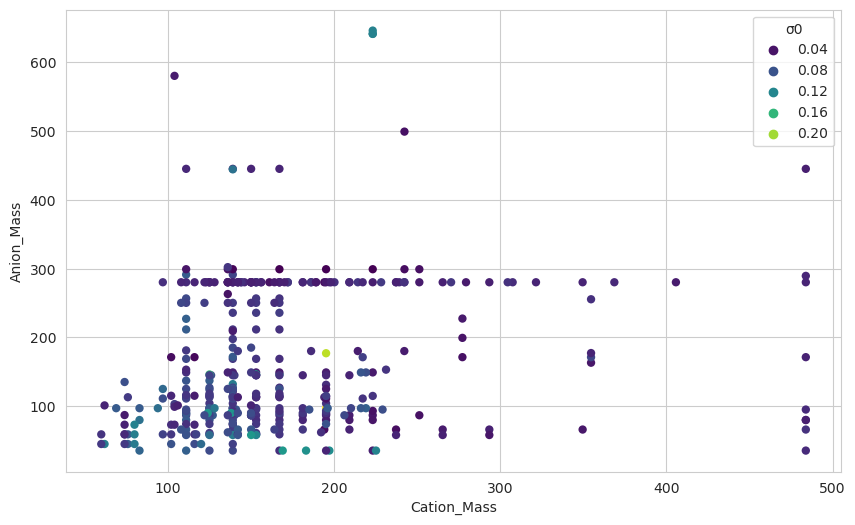

In [30]:
sns.set_style('whitegrid')

# Create a new figure with a specified size and DPI
plt.figure(figsize=(10, 6), dpi=100)

# Create the scatter plot with density represented as color
# Removed 'size' parameter for clarity
scatter = sns.scatterplot(data=clean_stension_data, x='Cation_Mass', y='Anion_Mass', hue='σ0', palette='viridis', edgecolor='none')

# Normalize the hue to the range of densities
norm = plt.Normalize(clean_stension_data['σ0'].min(), clean_stension_data['σ0'].max())


# Add a color bar for the density scale
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Show the color bar with the label
cbar = plt.colorbar(sm)
cbar.set_label('σ0')

# Set the plot labels and title
plt.xlabel('Cation Mass (g/mol)')
plt.ylabel('Anion Mass (g/mol)')
plt.title('Scatter Heatmap of Ionic Liquid surface tension by Cation and Anion Mass')

# Show the plot
plt.show()


In [31]:
catmass=np.array(clean_stension_data["Cation_Mass"])
anmass=np.array(clean_stension_data["Anion_Mass"])
stension=np.array(clean_stension_data["σ0"]) 
hi_sten_idx=np.where(stension>=0.05)
lo_sten_idx=np.where(stension<0.05)


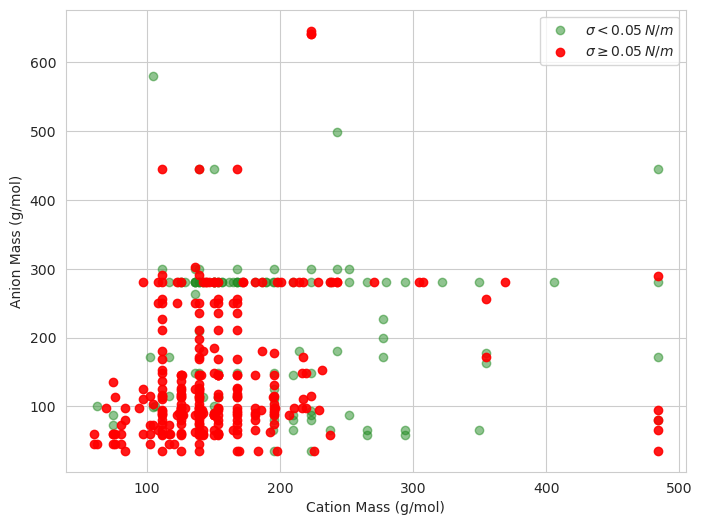

In [32]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(catmass[lo_sten_idx], anmass[lo_sten_idx], color='forestgreen', alpha=0.5, label=r"$\sigma< 0.05 \,N/m $")
plt.scatter(catmass[hi_sten_idx], anmass[hi_sten_idx], color='red', alpha=0.9, label=r"$\sigma \geq 0.05 \,N/m $")
plt.xlabel('Cation Mass (g/mol)')
plt.ylabel('Anion Mass (g/mol)')
plt.legend()
# Show the plot
plt.show()


In [33]:
clean_stension_data.to_excel('clean_stension_data.xlsx', index=False)

___

In [34]:
clean_density_data;
clean_viscosity_data;
clean_stension_data

,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,σ0
0,"1-hexyl-1,4-diazabicyclo[2.2.2]octan-1-ium",bis(trifluoromethylsulfonyl)azanide,CCCCCC[N@@+]12CC[N@@](CC1)CC2,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,197.340,280.147,0.053376
1,"1-decyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido[1,2-...",dicyanoazanide,CCCCCCCCCC[N+]1=C2CCCCCN2CCC1,N#C[N-]C#N,293.510,66.042,0.047620
2,"1-decyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido[1,2-...",thiocyanate,CCCCCCCCCC[N+]1=C2CCCCCN2CCC1,[S-]C#N,293.510,58.083,0.041088
3,"1-tetradecyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido...",dicyanoazanide,CCCCCCCCCCCCCC[N+]1=C2CCCCCN2CCC1,N#C[N-]C#N,349.626,66.042,0.042478
4,"1-ethyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido[1,2-...",dicyanoazanide,CC[N+]1=C2CCCCCN2CCC1,N#C[N-]C#N,181.302,66.042,0.061695
...,...,...,...,...,...,...,...
537,"5-ethoxy-1-ethyl-3,4-dihydro-2H-pyrrol-1-ium",bis(trifluoromethylsulfonyl)azanide,CCOC1=[N+](CC)CCC1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,142.218,280.147,NaN
538,"5-ethoxy-1-ethyl-3,4-dihydro-2H-pyrrol-1-ium",trifluoromethanesulfonate,CCOC1=[N+](CC)CCC1,[O-]S(=O)(=O)C(F)(F)F,142.218,149.070,NaN
539,2-oxopyrrolidin-1-ium,heptafluorobutanoate,O=C1CCC[NH2+]1,[O-]C(=O)C(F)(F)C(F)(F)C(F)(F)F,86.112,213.031,NaN
540,2-octylisoquinolin-2-ium,bis(flurosulfonyl)azanide,CCCCCCCC[n+]1ccc2ccccc2c1,FS(=O)(=O)[N-]S(F)(=O)=O,242.379,180.132,0.044644


In [35]:
ils_df1=(clean_density_data["Cation_Name"]+","+clean_density_data["Anion_Name"]).tolist()
ils_df2=(clean_viscosity_data["Cation_Name"]+","+clean_viscosity_data["Anion_Name"]).tolist()
ils_df3=(clean_stension_data["Cation_Name"]+","+clean_stension_data["Anion_Name"]).tolist()

In [36]:
# Convert lists to sets
set_df1 = set(ils_df1)
set_df2 = set(ils_df2)
set_df3 = set(ils_df3)
# Find common molecules
common_molecules = set_df3.intersection(set_df1, set_df2)
print("Number of common molecules:", len(common_molecules))


# Merge all sets into a single set
all_molecules = set_df1.union(set_df2, set_df3)

# Find the total number of unique molecules
total_unique_molecules = len(all_molecules)

print("Total number of unique molecules:", total_unique_molecules)




Number of common molecules: 335
Total number of unique molecules: 2261


In [37]:
# Assuming common_molecules contains the common molecules
common_molecules_list = list(common_molecules)

# Merge datasets on common molecules
merged_df1 = clean_density_data[(clean_density_data["Cation_Name"]+","+clean_density_data["Anion_Name"]).isin(common_molecules_list)]
merged_df2 = clean_viscosity_data[(clean_viscosity_data["Cation_Name"]+","+clean_viscosity_data["Anion_Name"]).isin(common_molecules_list)]
merged_df3 = clean_stension_data[(clean_stension_data["Cation_Name"]+","+clean_stension_data["Anion_Name"]).isin(common_molecules_list)]

# Concatenate merged dataframes
merged_df = pd.concat([merged_df1, merged_df2, merged_df3], ignore_index=True)

# Remaining datasets with only one or two properties
remaining_df1 = clean_density_data[~(clean_density_data["Cation_Name"]+","+clean_density_data["Anion_Name"]).isin(common_molecules_list)]
remaining_df2 = clean_viscosity_data[~(clean_viscosity_data["Cation_Name"]+","+clean_viscosity_data["Anion_Name"]).isin(common_molecules_list)]
remaining_df3 = clean_stension_data[~(clean_stension_data["Cation_Name"]+","+clean_stension_data["Anion_Name"]).isin(common_molecules_list)]

# Concatenate remaining dataframes
remaining_df = pd.concat([remaining_df1, remaining_df2, remaining_df3], ignore_index=True)

print("Shape of merged dataframe with common molecules:", merged_df.shape)
print("Shape of remaining dataframe with one or two properties only:", remaining_df.shape)


Shape of merged dataframe with common molecules: (1005, 9)
Shape of remaining dataframe with one or two properties only: (2672, 9)


In [38]:
merged_df

,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0
0,"1-hexyl-1,4-diazabicyclo[2.2.2]octan-1-ium",bis(trifluoromethylsulfonyl)azanide,CCCCCC[N@@+]12CC[N@@](CC1)CC2,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,197.340,280.147,1373.983393,NaN,NaN
1,"1-decyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido[1,2-...",dicyanoazanide,CCCCCCCCCC[N+]1=C2CCCCCN2CCC1,N#C[N-]C#N,293.510,66.042,1063.230603,NaN,NaN
2,"1-decyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido[1,2-...",thiocyanate,CCCCCCCCCC[N+]1=C2CCCCCN2CCC1,[S-]C#N,293.510,58.083,1010.803885,NaN,NaN
3,"1-tetradecyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido...",dicyanoazanide,CCCCCCCCCCCCCC[N+]1=C2CCCCCN2CCC1,N#C[N-]C#N,349.626,66.042,1025.416436,NaN,NaN
4,"1-ethyl-2H,3H,4H,6H,7H,8H,9H,10H-pyrimido[1,2-...",dicyanoazanide,CC[N+]1=C2CCCCCN2CCC1,N#C[N-]C#N,181.302,66.042,1215.514430,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1000,1-methyl-1-(2-methylpropyl)pyrrolidin-1-ium,bis(trifluoromethylsulfonyl)azanide,CC(C)C[N+]1(C)CCCC1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,142.261,280.147,NaN,NaN,0.047424
1001,1-hexyl-1-methylpyrrolidin-1-ium,bis(trifluoromethylsulfonyl)azanide,CCCCCC[N+]1(C)CCCC1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,170.314,280.147,NaN,NaN,0.047136
1002,1-methyl-1-octylpyrrolidin-1-ium,bis(trifluoromethylsulfonyl)azanide,CCCCCCCC[N+]1(C)CCCC1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,198.368,280.147,NaN,NaN,0.048656
1003,2-octylisoquinolin-2-ium,bis(flurosulfonyl)azanide,CCCCCCCC[n+]1ccc2ccccc2c1,FS(=O)(=O)[N-]S(F)(=O)=O,242.379,180.132,NaN,NaN,0.044644


In [39]:
# Grouping by 'Cation_Name' and 'Anion_Name' and aggregating the values
merged_df_grouped = merged_df.groupby(['Cation_Name', 'Anion_Name']).agg({
    'Cation_SMILES': 'first',
    'Anion_SMILES': 'first',
    'Cation_Mass': 'first',
    'Anion_Mass': 'first',
    'Density': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,
    'η0': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,
    'σ0': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan
}).reset_index()

# Displaying the resulting DataFrame
merged_df_grouped


,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0
0,1-methyl-1-(2-methylpropyl)pyrrolidin-1-ium,bis(trifluoromethylsulfonyl)azanide,CC(C)C[N+]1(C)CCCC1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,142.261,280.147,1400.029475,0.165927,0.047424
1,(2-hydroxyethyl)dimethyl(propan-2-yl)azanium,bis(trifluoromethylsulfonyl)azanide,CC(C)[N+](C)(C)CCO,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,132.223,280.147,1456.417950,0.210164,NaN
2,(2-hydroxyethyl)trimethylazanium,bis(nonaflurobutylsulfonyl)azanide,C[N+](C)(C)CCO,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)S(=O)(=O)[N-]S(=O...,104.170,580.192,1691.480060,2.874604,0.044692
3,(2-hydroxyethyl)trimethylazanium,propanedioate,C[N+](C)(C)CCO,OC(=O)CCC([O-])=O,104.170,103.054,1202.098450,7.389796,0.064716
4,(2-hydroxyethyl)trimethylazanium,propanoate,C[N+](C)(C)CCO,CCC([O-])=O,104.170,73.071,1069.362533,0.289474,0.051512
...,...,...,...,...,...,...,...,...,...
330,trioctylazanium,2-hexyldecanoate,CCCCCCCC[NH+](CCCCCCCC)CCCCCCCC,CCCCCCCC[C@@H](CCCCCC)C([O-])=O,354.686,255.423,845.658062,0.034325,0.056668
331,trioctylazanium,4-phenylbutanoate,CCCCCCCC[NH+](CCCCCCCC)CCCCCCCC,[O-]C(=O)CCCc1ccccc1,354.686,163.197,886.396020,0.029662,0.041437
332,trioctylazanium,4-tert-butylbenzoate,CCCCCCCC[NH+](CCCCCCCC)CCCCCCCC,CC(C)(C)c1ccc(cc1)C([O-])=O,354.686,177.224,890.357456,0.110609,0.049733
333,trioctylazanium,naphthalene-2-carboxylate,CCCCCCCC[NH+](CCCCCCCC)CCCCCCCC,[O-]C(=O)c1ccc2ccccc2c1,354.686,171.176,919.774360,0.165598,0.070494


In [40]:
merged_df_grouped[(merged_df_grouped["Cation_Name"] =="im-2,1") & (merged_df_grouped["Anion_Name"] =="bf4")]

,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0


In [41]:
merged_df_grouped[(merged_df_grouped["Cation_Name"] =="im-2,1") & (merged_df_grouped["Anion_Name"] =="fap")]

,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0


In [42]:
# Grouping by 'Cation_Name' and 'Anion_Name' and aggregating the values
rejected_df_grouped = remaining_df.groupby(['Cation_Name', 'Anion_Name']).agg({
    'Cation_SMILES': 'first',
    'Anion_SMILES': 'first',
    'Cation_Mass': 'first',
    'Anion_Mass': 'first',
    'Density': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,
    'η0': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,
    'σ0': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan
}).reset_index()

# Displaying the resulting DataFrame
rejected_df_grouped.head()

,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0
0,4-(dimethylamino)-1-[(octyloxy)methyl]pyridin...,bis(trifluoromethylsulfonyl)azanide,CCCCCCCCOC[n+]1ccc(cc1)N(C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,265.420,280.147,NaN,0.151300,NaN
1,(1-ethoxyethylidene)diethylazanium,bis(trifluoromethylsulfonyl)azanide,CCOC(C)=[N+](CC)CC,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,144.234,280.147,NaN,0.055016,NaN
2,(1-ethoxyethylidene)diethylazanium,trifluoromethanesulfonate,CCOC(C)=[N+](CC)CC,[O-]S(=O)(=O)C(F)(F)F,144.234,149.070,NaN,NaN,NaN
3,(1-ethoxyethylidene)dimethylazanium,bis(trifluoromethylsulfonyl)azanide,CCOC(C)=[N+](C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,116.180,280.147,NaN,0.040879,NaN
4,(1-ethoxyethylidene)dimethylazanium,trifluoromethanesulfonate,CCOC(C)=[N+](C)C,[O-]S(=O)(=O)C(F)(F)F,116.180,149.070,NaN,NaN,NaN


In [43]:
rejected_df_grouped

,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0
0,4-(dimethylamino)-1-[(octyloxy)methyl]pyridin...,bis(trifluoromethylsulfonyl)azanide,CCCCCCCCOC[n+]1ccc(cc1)N(C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,265.420,280.147,NaN,0.151300,NaN
1,(1-ethoxyethylidene)diethylazanium,bis(trifluoromethylsulfonyl)azanide,CCOC(C)=[N+](CC)CC,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,144.234,280.147,NaN,0.055016,NaN
2,(1-ethoxyethylidene)diethylazanium,trifluoromethanesulfonate,CCOC(C)=[N+](CC)CC,[O-]S(=O)(=O)C(F)(F)F,144.234,149.070,NaN,NaN,NaN
3,(1-ethoxyethylidene)dimethylazanium,bis(trifluoromethylsulfonyl)azanide,CCOC(C)=[N+](C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,116.180,280.147,NaN,0.040879,NaN
4,(1-ethoxyethylidene)dimethylazanium,trifluoromethanesulfonate,CCOC(C)=[N+](C)C,[O-]S(=O)(=O)C(F)(F)F,116.180,149.070,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1921,utyldiethyl(2-methoxy-2-oxoethyl)azanium,butyl sulfate,CCCC[N+](CC)(CC)CC(=O)OC,CCCCOS([O-])(=O)=O,202.317,153.177,NaN,NaN,NaN
1922,{9-[dimethyl(propan-2-yl)azaniumyl]nonyl}dimet...,bis(trifluoromethylsulfonyl)azanide,CC(C)[N+](C)(C)CCCCCCCCC[N+](C)(C)C(C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,300.574,280.147,1391.063829,NaN,NaN
1923,{[butyl(ethyl)amino](dimethylamino)methylidene...,bis(trifluoromethylsulfonyl)azanide,CCCCN(CC)C(N(C)C)=[N+](C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,200.344,280.147,NaN,0.078823,NaN
1924,{[butyl(methyl)amino](dimethylamino)methyliden...,bis(trifluoromethylsulfonyl)azanide,CCCCN(C)C(N(C)C)=[N+](C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,186.318,280.147,NaN,0.080242,NaN


___


Merge dataframes

In [44]:
concat_dfs=pd.concat([clean_density_data, clean_viscosity_data, clean_stension_data], ignore_index=True)

In [45]:
# Grouping by 'Cation_Name' and 'Anion_Name' and aggregating the values
merged_dataset = concat_dfs.groupby(['Cation_Name', 'Anion_Name']).agg({
    'Cation_SMILES': 'first',
    'Anion_SMILES': 'first',
    'Cation_Mass': 'first',
    'Anion_Mass': 'first',
    'Density': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,
    'η0': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,
    'σ0': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan
}).reset_index()

# Displaying the resulting DataFrame
merged_dataset

,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0
0,1-methyl-1-(2-methylpropyl)pyrrolidin-1-ium,bis(trifluoromethylsulfonyl)azanide,CC(C)C[N+]1(C)CCCC1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,142.261,280.147,1400.029475,0.165927,0.047424
1,4-(dimethylamino)-1-[(octyloxy)methyl]pyridin...,bis(trifluoromethylsulfonyl)azanide,CCCCCCCCOC[n+]1ccc(cc1)N(C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,265.420,280.147,NaN,0.151300,NaN
2,(1-ethoxyethylidene)diethylazanium,bis(trifluoromethylsulfonyl)azanide,CCOC(C)=[N+](CC)CC,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,144.234,280.147,NaN,0.055016,NaN
3,(1-ethoxyethylidene)diethylazanium,trifluoromethanesulfonate,CCOC(C)=[N+](CC)CC,[O-]S(=O)(=O)C(F)(F)F,144.234,149.070,NaN,NaN,NaN
4,(1-ethoxyethylidene)dimethylazanium,bis(trifluoromethylsulfonyl)azanide,CCOC(C)=[N+](C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,116.180,280.147,NaN,0.040879,NaN
...,...,...,...,...,...,...,...,...,...
2256,utyldiethyl(2-methoxy-2-oxoethyl)azanium,butyl sulfate,CCCC[N+](CC)(CC)CC(=O)OC,CCCCOS([O-])(=O)=O,202.317,153.177,NaN,NaN,NaN
2257,{9-[dimethyl(propan-2-yl)azaniumyl]nonyl}dimet...,bis(trifluoromethylsulfonyl)azanide,CC(C)[N+](C)(C)CCCCCCCCC[N+](C)(C)C(C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,300.574,280.147,1391.063829,NaN,NaN
2258,{[butyl(ethyl)amino](dimethylamino)methylidene...,bis(trifluoromethylsulfonyl)azanide,CCCCN(CC)C(N(C)C)=[N+](C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,200.344,280.147,NaN,0.078823,NaN
2259,{[butyl(methyl)amino](dimethylamino)methyliden...,bis(trifluoromethylsulfonyl)azanide,CCCCN(C)C(N(C)C)=[N+](C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,186.318,280.147,NaN,0.080242,NaN


In [46]:
merged_dataset.to_excel('merged_dataset.xlsx', index=False)

In [47]:
print("The number of unique cations is:",len(set(merged_dataset["Cation_Name"])))
print("The number of unique anions is:",len(set(merged_dataset["Anion_Name"])))

The number of unique cations is: 958
The number of unique anions is: 272


In [48]:
dens_req=1284
visc_req=0.037223 #  
visc_req=0.060121 #  
sten_req=0.05

condition_satisfy_all = (merged_dataset["Density"] >= dens_req) & (merged_dataset["η0"] <= visc_req) & (merged_dataset["σ0"] >= sten_req)
condition_rejected = (merged_dataset["Density"] < dens_req) | (merged_dataset["η0"] > visc_req) | (merged_dataset["σ0"] < sten_req)
remaining_mask = ~(condition_satisfy_all | condition_rejected)


satisfy_all= merged_dataset[condition_satisfy_all]
rejected= merged_dataset[condition_rejected]
remaining = merged_dataset[remaining_mask]

print("the number of ILs that satisfy all requirements is:", satisfy_all.shape[0])
print("the number of ILs that are rejected is:", rejected.shape[0])
print("The number of ILs that we are uncertain about is:", remaining.shape[0])
print("---")
print("The ILs that satisfy all requirements are:")
satisfy_all


the number of ILs that satisfy all requirements is: 14
the number of ILs that are rejected is: 1782
The number of ILs that we are uncertain about is: 465
---
The ILs that satisfy all requirements are:


,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density,η0,σ0
231,"1,3-dimethyl-1H-imidazol-3-ium",bis(trifluoromethylsulfonyl)azanide,Cn1cc[n+](C)c1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,97.138,280.147,1569.049191,0.038385,0.056394
480,1-butyl-1-methylpyrrolidin-1-ium,bis(flurosulfonyl)azanide,CCCC[N+]1(C)CCCC1,FS(=O)(=O)[N-]S(F)(=O)=O,142.261,180.132,1306.878044,0.056272,0.063883
613,1-butyl-3-methyl-1H-imidazol-3-ium,tetrachloroferrate (III),CCCCn1cc[n+](C)c1,Cl[Fe-](Cl)(Cl)Cl,139.218,197.658,1365.676142,0.046000,0.063467
650,1-butyl-4-methylpyridin-1-ium,bis(trifluoromethylsulfonyl)azanide,CCCC[n+]1ccc(C)cc1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,150.240,280.147,1412.146712,0.055959,0.051208
801,1-ethyl-3-methyl-1H-imidazol-3-ium,bis(trifluoromethylsulfonyl)azanide,CCn1cc[n+](C)c1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,111.164,280.147,1518.598257,0.032092,0.053045
847,1-ethyl-3-methyl-1H-imidazol-3-ium,tetrachloroaluminate,CCn1cc[n+](C)c1,Cl[Al-](Cl)(Cl)Cl,111.164,168.794,1295.215487,0.017910,0.073243
849,1-ethyl-3-methyl-1H-imidazol-3-ium,tetrachlorogallate,CCn1cc[n+](C)c1,Cl[Ga-](Cl)(Cl)Cl,111.164,211.536,1474.900509,0.013000,0.086757
852,1-ethyl-3-methyl-1H-imidazol-3-ium,tetrafluoroborate,CCn1cc[n+](C)c1,F[B-](F)(F)F,111.164,86.805,1284.238568,0.037222,0.064249
864,1-ethyl-3-methyl-1H-imidazol-3-ium,trifluoroacetate,CCn1cc[n+](C)c1,[O-]C(=O)C(F)(F)F,111.164,113.016,1291.499820,0.031351,0.067669
865,1-ethyl-3-methyl-1H-imidazol-3-ium,trifluoromethanesulfonate,CCn1cc[n+](C)c1,[O-]S(=O)(=O)C(F)(F)F,111.164,149.070,1384.276236,0.040498,0.056471


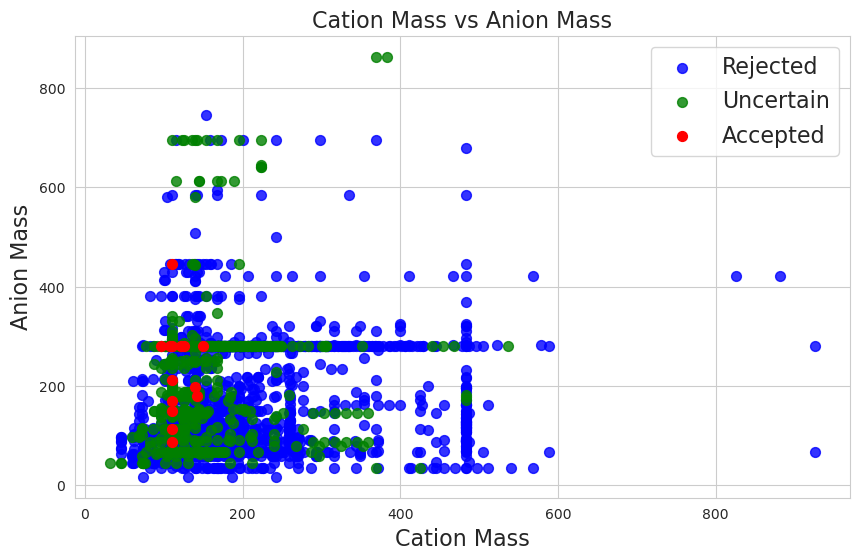

In [49]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

plt.scatter(rejected["Cation_Mass"], rejected["Anion_Mass"],marker='o', s=50, color="blue",alpha=0.8,label="Rejected")
plt.scatter(remaining["Cation_Mass"], remaining["Anion_Mass"],marker='o', s=50, color="green",alpha=0.8,label="Uncertain")
plt.scatter(satisfy_all["Cation_Mass"], satisfy_all["Anion_Mass"],marker='o', s=50,color="red",alpha=1,label="Accepted") 

plt.title('Cation Mass vs Anion Mass',fontsize=16)  # Title of the plot
plt.xlabel('Cation Mass',fontsize=16)  # X-axis label
plt.ylabel('Anion Mass',fontsize=16)  # Y-axis label
plt.grid(True)  # Show grid lines (optional)
plt.legend(fontsize=16)

plt.show()  # Display the plot

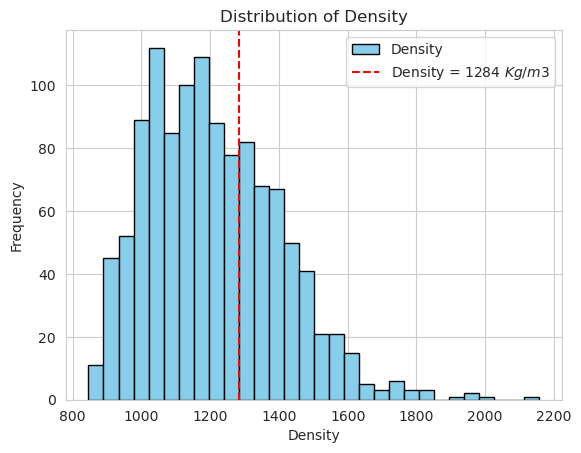

In [50]:
(merged_dataset["Density"].dropna()).plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=dens_req, color='red', linestyle='--', label=f'Density = {dens_req} $Kg/m3$' )
plt.title('Distribution of Density')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.legend()



<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2309364/4156375479.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.axvline(x=visc_req, color='red', linestyle='--', label=f'$\eta_0$ = {visc_req:.3f} $Pa \cdot s$')
/tmp/ipykernel_2309364/4156375479.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.axvline(x=visc_req, color='red', linestyle='--', label=f'$\eta_0$ = {visc_req:.3f} $Pa \cdot s$')


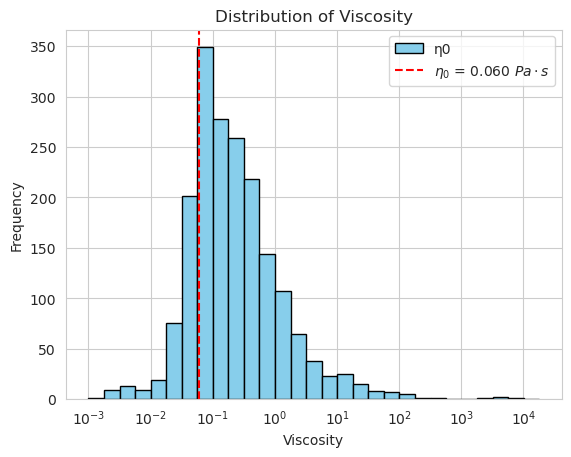

In [51]:
log_bins = np.logspace(np.log10(0.001), np.log10(18000), 30)

(merged_dataset["η0"].dropna()).plot(kind='hist', bins=log_bins, color='skyblue', edgecolor='black')
plt.xscale('log')

plt.axvline(x=visc_req, color='red', linestyle='--', label=f'$\eta_0$ = {visc_req:.3f} $Pa \cdot s$')
plt.title('Distribution of Viscosity')
plt.xlabel('Viscosity')
plt.ylabel('Frequency')
plt.legend()




<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2309364/2916356052.py:2: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x=sten_req, color='red', linestyle='--', lw=2,label=f'$\sigma_0$ = {sten_req} $N/m$ ')


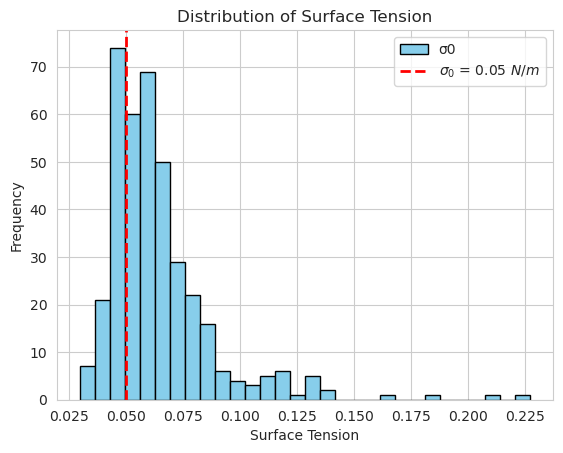

In [52]:
(merged_dataset["σ0"].dropna()).plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=sten_req, color='red', linestyle='--', lw=2,label=f'$\sigma_0$ = {sten_req} $N/m$ ')
plt.title('Distribution of Surface Tension')
plt.xlabel('Surface Tension')
plt.ylabel('Frequency')
plt.legend()
